In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"AirTraffic.csv")
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,GEO Region,Terminal,Boarding Area,Passenger Count,Year,Month
0,200507,ATA Airlines,TZ,US,Terminal 1,B,27271,2005,July
1,200507,ATA Airlines,TZ,US,Terminal 1,B,29131,2005,July
2,200507,ATA Airlines,TZ,US,Terminal 1,B,5415,2005,July
3,200507,Air Canada,AC,Canada,Terminal 1,B,35156,2005,July
4,200507,Air Canada,AC,Canada,Terminal 1,B,34090,2005,July


In [58]:
df1 = df.copy()
df1.duplicated().sum()

np.int64(32)

In [59]:
df1 = df1.drop_duplicates(keep='first')
df1.duplicated().sum()

np.int64(0)

In [60]:
df1.isna().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    38
GEO Region                      0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
Year                            0
Month                           0
dtype: int64

In [61]:
df1 = df1.drop(columns = ['Activity Period','Operating Airline','Operating Airline IATA Code','Terminal','Boarding Area'])
df1.head()

,GEO Region,Passenger Count,Year,Month
0,US,27271,2005,July
1,US,29131,2005,July
2,US,5415,2005,July
3,Canada,35156,2005,July
4,Canada,34090,2005,July


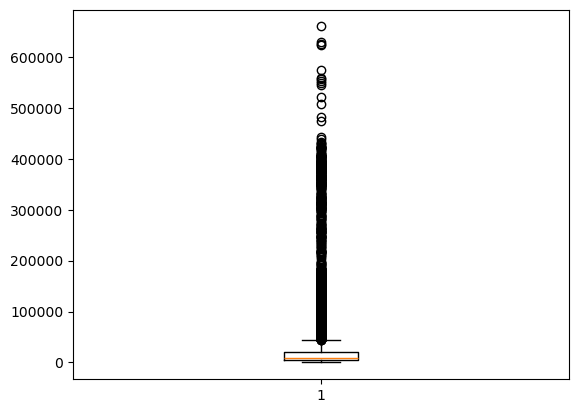

In [62]:
plt.boxplot(df1['Passenger Count'])
plt.show()

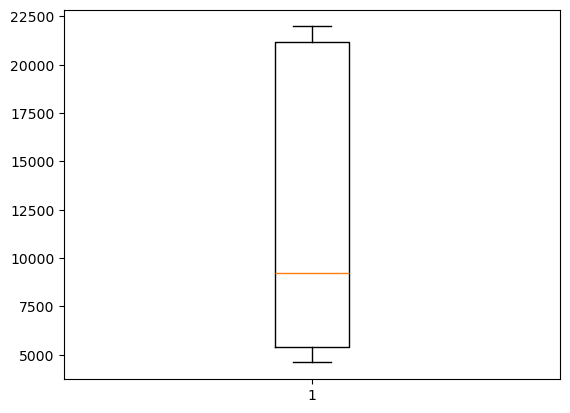

In [63]:
from feature_engine.outliers import Winsorizer
a = Winsorizer(capping_method = 'iqr',tail='both',fold = 0.05, variables = ['Passenger Count'])
df1 = a.fit_transform(df1)
plt.boxplot(df1['Passenger Count'])
plt.show()

In [64]:
df1.head()

,GEO Region,Passenger Count,Year,Month
0,US,21980,2005,July
1,US,21980,2005,July
2,US,5415,2005,July
3,Canada,21980,2005,July
4,Canada,21980,2005,July


In [65]:
from sklearn.preprocessing import OneHotEncoder
b = OneHotEncoder(sparse_output = False)
encoded_df = b.fit_transform(df1[['GEO Region','Month']])
encdf = pd.DataFrame(encoded_df,columns = b.get_feature_names_out())
df1 = pd.concat([df1.drop(columns=['GEO Region','Month']),encdf],axis=1)
df1.head()

,Passenger Count,Year,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,21980.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,21980.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5415.0,2005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,21980.0,2005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21980.0,2005.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
from sklearn.preprocessing import StandardScaler
c = StandardScaler()
df1 = c.fit_transform(df1)
scaled_df = pd.DataFrame(df1,columns= c.get_feature_names_out())
scaled_df.head()

,Passenger Count,Year,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
0,1.443831,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
1,1.443831,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
2,-0.936283,-1.716318,-0.528553,-0.227515,-0.323160,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
3,1.443831,-1.716318,-0.528553,-0.227515,3.094441,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935
4,1.443831,-1.716318,-0.528553,-0.227515,3.094441,-0.136268,-0.402074,-0.283495,-0.120406,-0.077758,...,-0.302444,-0.302181,-0.303626,3.240607,-0.292335,-0.301786,-0.290987,-0.30297,-0.307024,-0.307935


In [67]:
for i in scaled_df.columns:
    print(i,scaled_df[i].var())

Passenger Count 1.0000667824228369
Year 1.0000667824227123
GEO Region_Asia 1.0000667824227818
GEO Region_Australia / Oceania 1.0000667824229208
GEO Region_Canada 1.0000667824229648
GEO Region_Central America 1.0000667824231408
GEO Region_Europe 1.0000667824227059
GEO Region_Mexico 1.0000667824226914
GEO Region_Middle East 1.0000667824227836
GEO Region_South America 1.0000667824226974
GEO Region_US 1.0000667824227079
Month_April 1.0000667824226093
Month_August 1.0000667824227445
Month_December 1.000066782423141
Month_February 1.0000667824229414
Month_January 1.000066782422589
Month_July 1.0000667824230172
Month_June 1.0000667824225349
Month_March 1.0000667824229372
Month_May 1.0000667824225498
Month_November 1.000066782423047
Month_October 1.0000667824225953
Month_September 1.0000667824226432


In [68]:
cor = scaled_df.corr()
cor

,Passenger Count,Year,GEO Region_Asia,GEO Region_Australia / Oceania,GEO Region_Canada,GEO Region_Central America,GEO Region_Europe,GEO Region_Mexico,GEO Region_Middle East,GEO Region_South America,...,Month_December,Month_February,Month_January,Month_July,Month_June,Month_March,Month_May,Month_November,Month_October,Month_September
Passenger Count,1.000000,0.048400,-0.031669,-0.017497,0.040653,0.008912,0.019073,-0.040195,0.024475,-0.012745,...,-0.014383,-0.041274,-0.009152,0.031809,0.028017,-0.013090,0.014105,-0.022912,0.000439,-0.004020
Year,0.048400,1.000000,0.001639,-0.038005,0.026460,0.010870,0.035956,0.018120,0.084236,0.037139,...,-0.034882,0.068244,0.049760,-0.039398,0.012904,0.065753,0.015131,-0.032634,-0.035351,-0.040313
GEO Region_Asia,-0.031669,0.001639,1.000000,-0.120253,-0.170807,-0.072025,-0.212517,-0.149842,-0.063641,-0.041099,...,0.005806,0.003146,0.003482,-0.003620,-0.001471,0.003533,-0.003174,0.001794,-0.002125,-0.003573
GEO Region_Australia / Oceania,-0.017497,-0.038005,-0.120253,1.000000,-0.073524,-0.031003,-0.091478,-0.064499,-0.027394,-0.017691,...,0.001376,0.001486,0.000879,-0.002277,-0.001175,0.003885,0.002839,-0.001070,-0.002737,-0.003109
GEO Region_Canada,0.040653,0.026460,-0.170807,-0.073524,1.000000,-0.044036,-0.129934,-0.091614,-0.038910,-0.025128,...,-0.005493,-0.004517,-0.004532,0.003958,0.004675,-0.005938,0.000393,-0.004152,0.008964,0.005160
GEO Region_Central America,0.008912,0.010870,-0.072025,-0.031003,-0.044036,1.000000,-0.054790,-0.038631,-0.016407,-0.010596,...,0.002019,0.002086,0.001718,-0.003075,-0.002768,0.002187,-0.002440,0.003684,0.000859,0.000630
GEO Region_Europe,0.019073,0.035956,-0.212517,-0.091478,-0.129934,-0.054790,1.000000,-0.113986,-0.048412,-0.031265,...,-0.006024,-0.005138,-0.006874,0.010139,0.007826,-0.004852,0.002385,-0.005707,0.000328,0.003775
GEO Region_Mexico,-0.040195,0.018120,-0.149842,-0.064499,-0.091614,-0.038631,-0.113986,1.000000,-0.034135,-0.022044,...,-0.000331,0.007158,0.003634,-0.000774,-0.002557,0.006451,-0.000913,0.000314,-0.003595,-0.005867
GEO Region_Middle East,0.024475,0.084236,-0.063641,-0.027394,-0.038910,-0.016407,-0.048412,-0.034135,1.000000,-0.009363,...,0.008255,0.008319,0.003920,-0.005204,-0.001773,0.004347,-0.001480,0.000017,-0.004882,-0.005071
GEO Region_South America,-0.012745,0.037139,-0.041099,-0.017691,-0.025128,-0.010596,-0.031265,-0.022044,-0.009363,1.000000,...,0.001426,0.001465,0.001254,0.000536,-0.003483,0.001523,-0.003303,0.001349,0.000761,0.000630


In [69]:
scaled_df.isna().sum()
clean = scaled_df[~np.isnan(scaled_df).any(axis=1)]

[clusteval] >INFO> Saving data in memory.
[clusteval] >INFO> Fit with method=[agglomerative], metric=[euclidean], linkage=[complete]
[clusteval] >INFO> Evaluate using silhouette.
[clusteval] >INFO: 100%|████████████████████████| 23/23 [00:41<00:00,  1.81s/it]
[clusteval] >INFO> Compute dendrogram threshold.
[clusteval] >INFO> Optimal number clusters detected: [2].
[clusteval] >INFO> Fin.


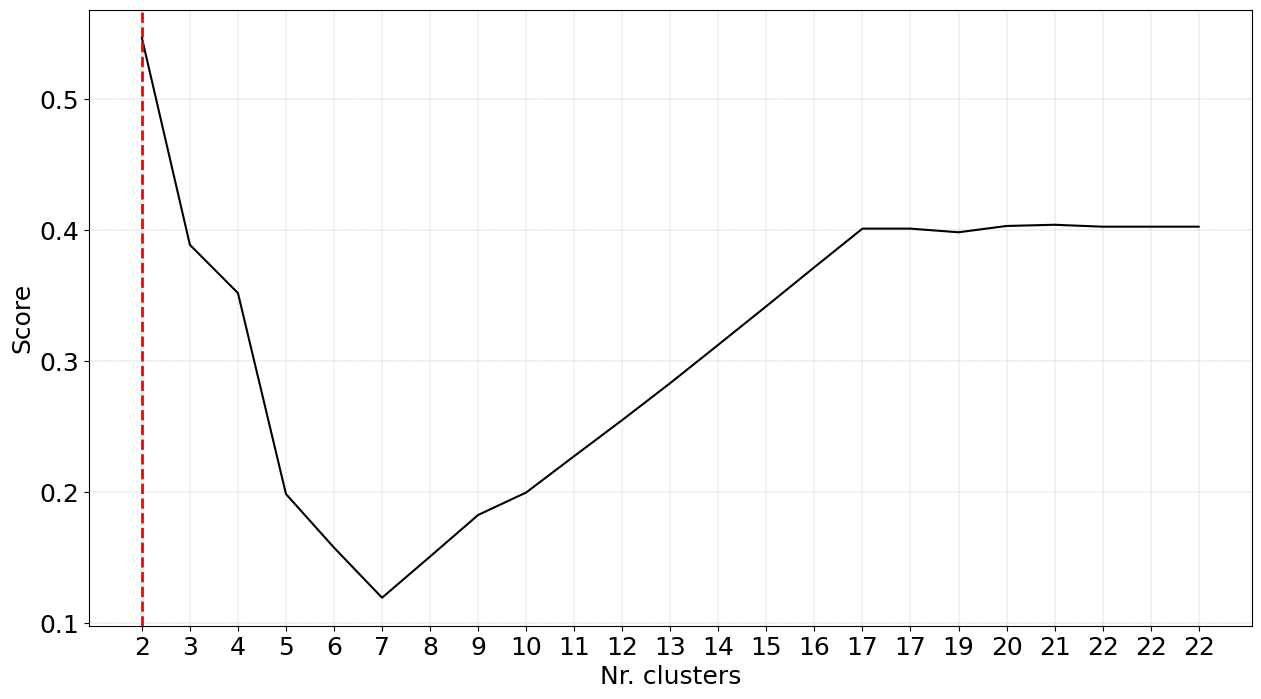

(<Figure size 1500x800 with 1 Axes>,
 <Axes: xlabel='Nr. clusters', ylabel='Score'>)

In [71]:
from sklearn.cluster import AgglomerativeClustering
from clusteval import clusteval

ce = clusteval(cluster='agglomerative', evaluate='silhouette',linkage='complete')
ce.fit(clean)

# Plot or view results
ce.plot()


In [72]:
hc1 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
y_hc1 = hc1.fit_predict(clean)
y_hc1

array([0, 0, 0, ..., 0, 0, 0])

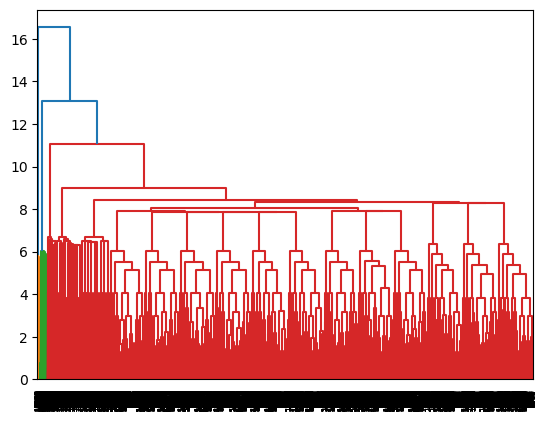

In [78]:
from scipy.cluster.hierarchy import linkage, dendrogram
tree_plot = dendrogram(linkage(clean, method="complete"))